In [1]:
import numpy as np
import torch
from torch import nn
from torch.functional import F
from typing import Any
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore")
import seaborn as sns
import random

def plot_vector(vector, title:str='', apply_sigmoid=False, to_sort=True):
    if apply_sigmoid:
        vector = sigmoid(vector)
    if to_sort:
        vector = sorted(vector)
    plt.plot(vector)
    plt.title(title)
    plt.show()
   
    
def load_obj(path: str) -> Any:
    with open(path, 'rb') as f:
        return pickle.load(f)

In [35]:
attention_scores = torch.randn(1, 12, 197, 197)

In [44]:
temp = torch.ones(12, 12, 1) * 0.5

In [48]:
temp[0, 2] = torch.tensor(0)

In [49]:
temp

tensor([[[0.5000],
         [0.5000],
         [0.0000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000]],

        [[0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000]],

        [[0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000]],

        [[0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000]],

        [[0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
    

In [36]:
temp.shape, attention_scores.shape

(torch.Size([12, 12, 1]), torch.Size([1, 12, 197, 197]))

In [41]:
attention_scores.shape, temp[layer_idx].unsqueeze(0).unsqueeze(2).shape

(torch.Size([1, 12, 197, 197]), torch.Size([1, 12, 1, 1]))

In [57]:
a = torch.randn(12, 12, 197)

In [ ]:
0, 1, 5, 6, 7, 8

In [ ]:
[[1.2500], 0
 [0.9499], 1
 [0.7837], 2
 [0.7494], 3
 [0.7439], 4
 [1.3396], 5
 [1.1944], 6
 [1.1846], 7
 [1.1533], 8 
 [0.7286], 9
 [0.8250], 10
 [0.7441] 11

In [59]:
torch.mean(torch.abs(a))

tensor(0.7944)

In [51]:
layer_idx = 0
att = attention_scores * temp[layer_idx].unsqueeze(0).unsqueeze(2)

In [56]:
att[0, 2]

tensor([[-0., -0., -0.,  ..., 0., 0., 0.],
        [0., -0., 0.,  ..., 0., 0., -0.],
        [0., -0., 0.,  ..., 0., 0., -0.],
        ...,
        [-0., -0., -0.,  ..., -0., -0., 0.],
        [-0., -0., 0.,  ..., 0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., 0.]])

In [19]:
temp = load_obj(r"C:\Users\asher\Desktop\temp.pkl")

In [20]:
from torch import Tensor
def entropy(p_dist: Tensor) -> Tensor:
    # return sum([-p * torch.log2(p) if p > 0 else 0 for p in p_dist])
    return torch.sum(torch.nan_to_num_(-torch.log2(p_dist) * p_dist, nan=0.0))

In [21]:
temp_1 = torch.tensor([999, 1 , 1]).float()
temp_2 = torch.tensor([6, 6, 1]).float()
temp_3 = torch.tensor([2, 2.1, 1.9, 0.2]).float()
uniform = torch.tensor([1/3, 1/3, 1/3]).float()

In [22]:
F.softmax(temp_3)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.3149, 0.3481, 0.2850, 0.0521])

In [27]:
print(entropy(F.softmax(temp_1)))
print(entropy(F.softmax(temp_2)))
print(entropy(F.softmax(temp_3)))
print(entropy(F.softmax(uniform)))

tensor(0.)
tensor(1.0291)
tensor(1.7930)
tensor(1.5850)


C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.
C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from

temp = load_obj(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\mul_temp_softmax_lr0_003+l1_0+kl_loss_0+entropy_loss_1000+pred_loss_10\0000000004\temp.pkl")

In [6]:
temp.shape

torch.Size([12, 12, 197])

In [24]:
temp.min().item(), temp.max().item()

(0.39457276463508606, 1.6020605564117432)

In [25]:
temp[-1][0]

tensor([0.4139, 0.4139, 0.4138, 0.4138, 0.4136, 0.4139, 0.4137, 0.4139, 0.4139,
        0.4139, 0.4136, 0.4136, 0.4139, 0.4136, 0.4139, 0.4136, 0.4137, 0.4137,
        0.4137, 0.4134, 0.4139, 0.4139, 0.4139, 0.4137, 0.4138, 0.4137, 0.4137,
        0.4137, 0.4139, 0.4137, 0.4137, 0.4137, 0.4138, 0.4138, 1.5859, 0.4132,
        0.4138, 1.5861, 0.4133, 0.4137, 1.5861, 0.4138, 0.4138, 0.4137, 1.5859,
        0.4137, 1.5859, 1.5860, 1.5859, 0.4116, 1.5858, 0.4122, 0.4133, 1.5859,
        1.5860, 0.4137, 0.4139, 0.4136, 0.4139, 1.5859, 1.5859, 1.5860, 0.4139,
        1.5860, 0.4136, 1.5860, 1.5858, 0.4139, 1.5859, 1.5860, 0.4139, 0.4137,
        1.5858, 1.5860, 0.4139, 1.5861, 1.5859, 0.4136, 1.5860, 1.5861, 1.5860,
        1.5860, 0.4135, 1.5860, 0.4136, 0.4136, 0.4138, 0.4135, 0.4135, 0.4138,
        0.4135, 1.5859, 1.5860, 1.5858, 1.5859, 0.4138, 1.5861, 0.4137, 0.4138,
        0.4133, 0.4135, 0.4132, 0.4134, 0.4132, 0.4139, 0.4139, 0.4139, 0.4137,
        0.4139, 0.4134, 0.4138, 0.4137, 

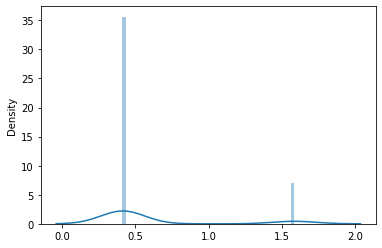

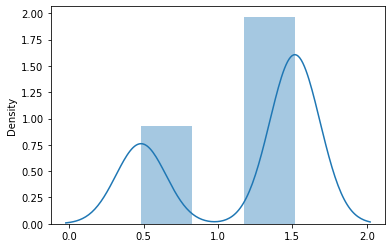

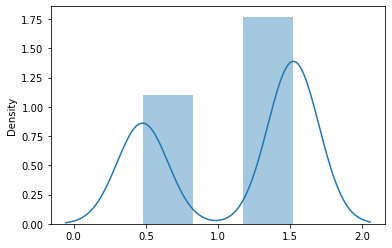

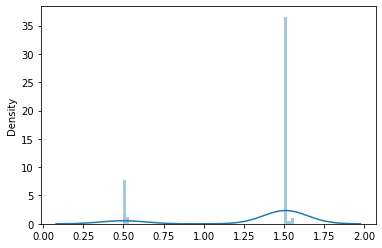

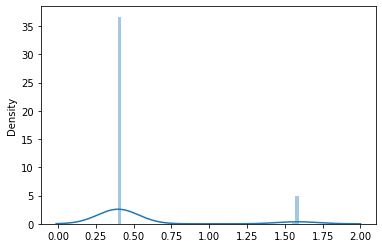

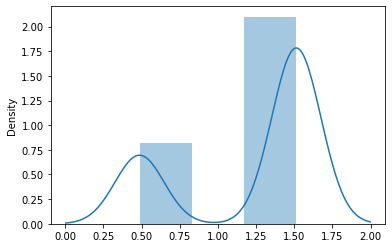

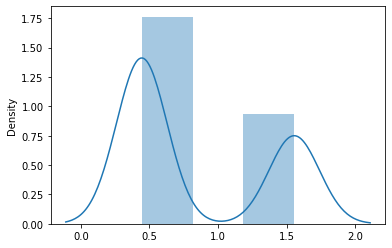

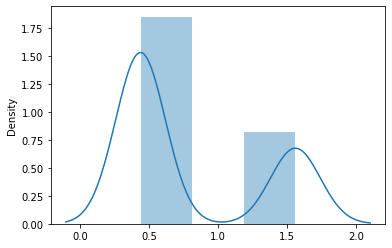

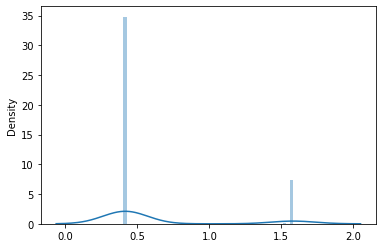

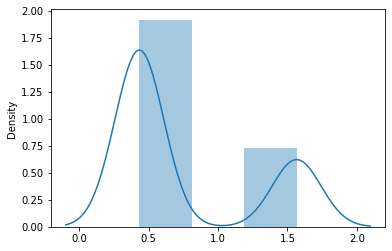

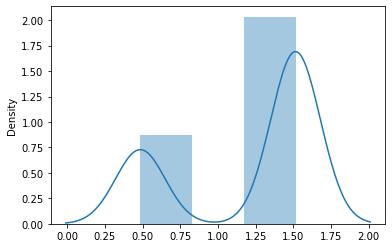

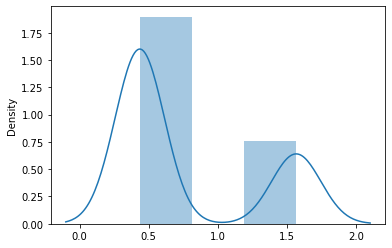

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

temp = temp.detach().numpy()
for i in range(12):
    sns.distplot(temp[-1][i][1:])
    plt.show()

In [27]:
temp_end = load_obj(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\mul_temp_softmax_lr0_001+l1_0+kl_loss_0+entropy_loss_1000+pred_loss_10\0000000004\objects\temp.pkl")

In [29]:
temp_end.min().item(), temp_end.max().item()

(0.10682689398527145, 1.8907428979873657)

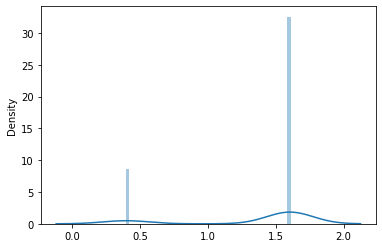

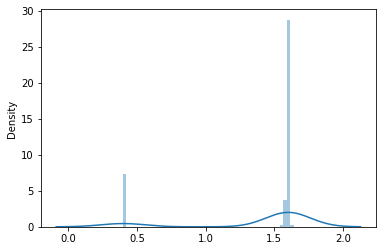

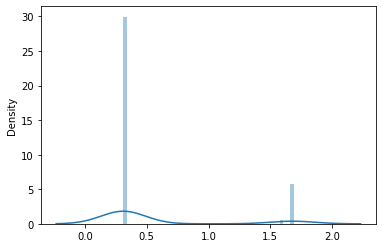

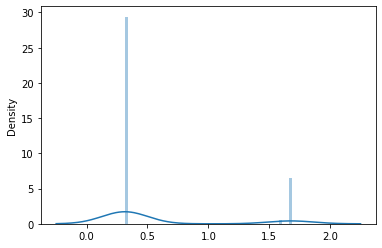

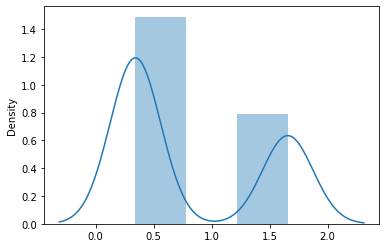

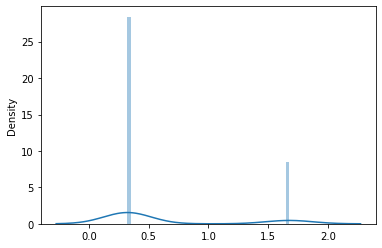

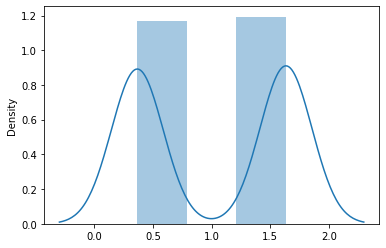

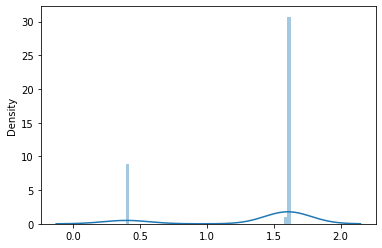

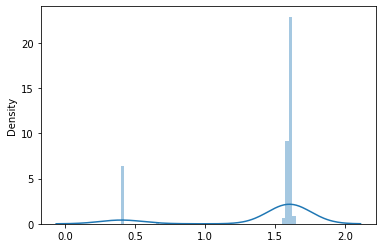

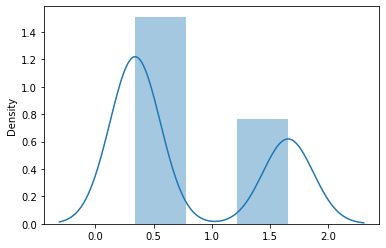

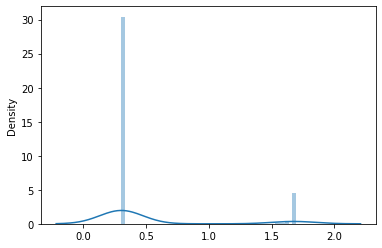

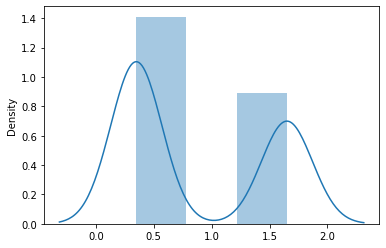

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
temp_end_path = r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\test_vis_mul_temp_softmax_lr0_003+l1_0+kl_loss_0+entropy_loss_100+pred_loss_10\0000000001\objects\temp.pkl"
temp_end = load_obj(temp_end_path)
temp_end = temp_end.detach().numpy()
for i in range(12):
    sns.distplot(temp_end[-1][i][1:])
    plt.show()

In [4]:
temp_end

array([[[1.4371624 , 1.6390787 , 0.46080494, ..., 0.36095634,
         0.36095023, 0.36079913],
        [1.6026055 , 0.37053075, 1.6303211 , ..., 1.6302669 ,
         1.6301816 , 0.370915  ],
        [0.51712406, 0.36050817, 0.36124566, ..., 0.36053163,
         1.6417044 , 0.36088026],
        ...,
        [0.38214305, 1.6256475 , 1.6286712 , ..., 1.628573  ,
         1.6298959 , 1.6299963 ],
        [1.5103065 , 0.32068425, 0.32066306, ..., 0.32064563,
         0.320761  , 0.32076716],
        [0.395047  , 1.6184552 , 1.6184548 , ..., 1.6186427 ,
         1.6189284 , 1.6190289 ]],

       [[1.6486071 , 1.6390481 , 1.6358402 , ..., 0.36153936,
         1.6344347 , 1.6370591 ],
        [0.37327737, 1.6363202 , 1.6341851 , ..., 0.36433786,
         0.3674727 , 1.6306334 ],
        [1.5930485 , 1.6455538 , 1.6453823 , ..., 0.353243  ,
         0.3532794 , 0.35370013],
        ...,
        [0.43591022, 1.6324965 , 1.6285253 , ..., 0.3711441 ,
         0.37071472, 0.37180844],
        [1.5

In [242]:
temps_path = r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\vis_mul_temp_softmax_lr0_003+l1_1000+kl_loss_0+entropy_loss_100+pred_loss_10\00000009\objects\temps.pkl"

In [243]:
temps = load_obj(temps_path)
temp = temps[170]
temp = temp.detach().numpy()

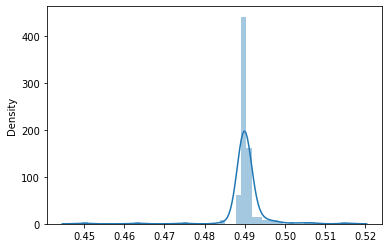

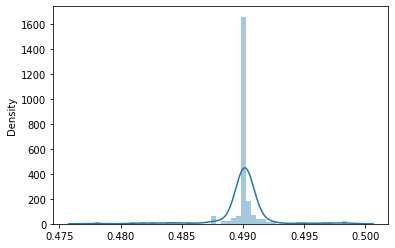

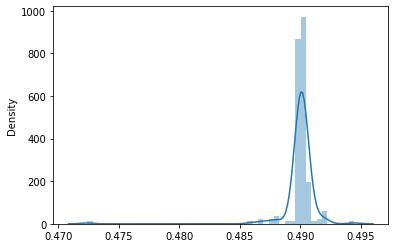

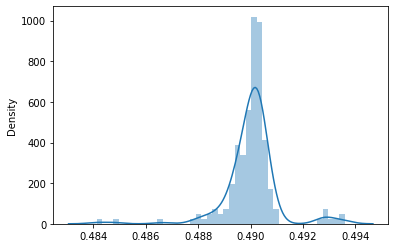

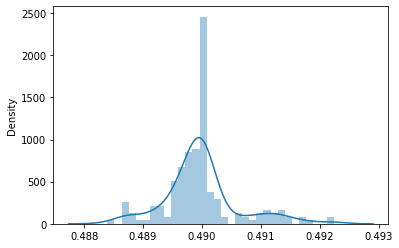

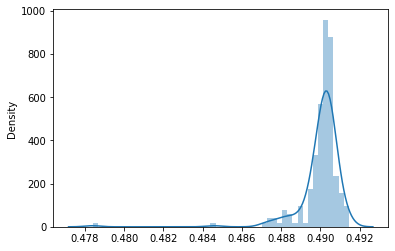

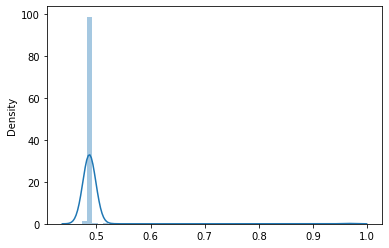

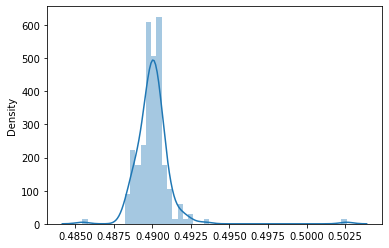

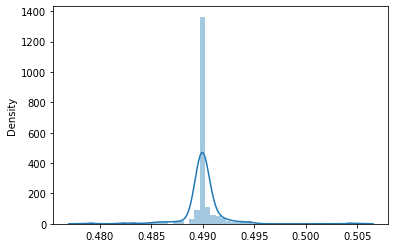

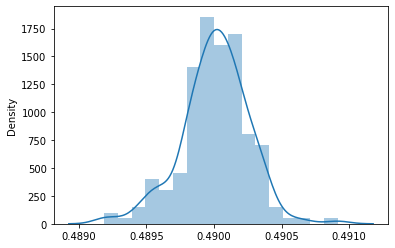

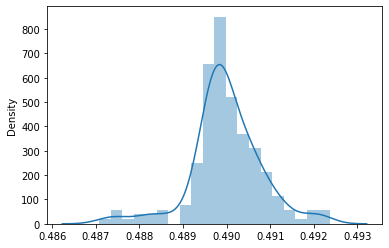

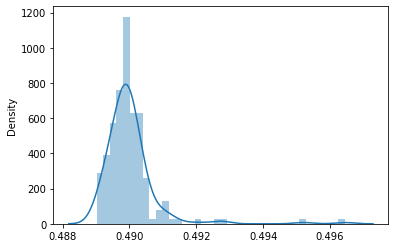

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(12):
    sns.distplot(temp[-1][i][1:], norm_hist=False)
    plt.show()

Plot temp tokens as image - Dividing

In [5]:
from pathlib import Path
temp_div = load_obj(r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\div_temp_softmax_lr0_003+l1_0+kl_loss_0+entropy_loss_1000+pred_loss_10\0000000004\objects\temp.pkl")
patch_size = 16
image_size = 224
num_heads = 12

attentions = torch.tensor(temp_div[-1][3][1:])
w_featmap, h_featmap = image_size // patch_size, image_size // patch_size
attentions = attentions.reshape(1, w_featmap, h_featmap)
attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[
    0].cpu().detach().numpy()

plt.imsave(fname=Path('.', 'test.png'), arr=attentions.mean(axis=0), format='png')

NameError: name 'temp' is not defined

Plot temp tokens as image - Multiplier

In [53]:
temp_end.shape

torch.Size([12, 12, 197])

In [62]:
temp_end[-1][0, 1:].shape

torch.Size([196])

In [59]:
temp_end[-1, :, 1:].shape

torch.Size([12, 196])

In [56]:
temp_end[:, 0, 1:].reshape(12, -1).shape

torch.Size([12, 196])

In [ ]:
attentions = torch.tensor(temp[-1][i][1:])


In [ ]:
from pathlib import Path
patch_size = 16
image_size = 224
num_heads = 12
attentions = torch.tensor(temp_end[-1][3][1:])
w_featmap, h_featmap = image_size // patch_size, image_size // patch_size
attentions = attentions.reshape(1, w_featmap, h_featmap)
attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[
    0].cpu().detach().numpy()

plt.imsave(fname=Path('.', 'test.png'), arr=attentions.mean(axis=0), format='png')

In [29]:
len(torch.where(temp[-1].median(dim=0)[0][1:] < 0.5)[0])

120

In [28]:
torch.where(temp[-1].median(dim=0)[0][1:] > 0.5)[0]

tensor([  5,  12,  15,  26,  29,  30,  31,  32,  33,  34,  41,  44,  45,  46,
         47,  58,  59,  60,  61,  69,  72,  73,  75,  76,  83,  86,  87,  89,
         90,  97,  98,  99, 100, 103, 111, 113, 114, 117, 125, 127, 128, 129,
        130, 131, 139, 141, 142, 143, 145, 146, 147, 153, 155, 156, 159, 160,
        161, 165, 167, 168, 169, 170, 172, 173, 174, 179, 180, 182, 183, 184,
        185, 186, 187, 188, 193, 195])

In [30]:
temp[-1].median(dim=0)[0][1:]

tensor([0.3426, 0.3426, 0.3426, 0.3489, 0.3489, 1.6020, 0.3657, 0.3657, 0.3652,
        0.3420, 0.3491, 0.3655, 1.6008, 0.3656, 0.3653, 1.6018, 0.3426, 0.3489,
        0.3427, 0.3494, 0.3424, 0.3421, 0.3420, 0.3420, 0.3421, 0.3493, 1.6037,
        0.3653, 0.3653, 1.6347, 1.6347, 1.6023, 1.6041, 1.6097, 1.5449, 0.3489,
        0.3492, 0.3421, 0.3422, 0.3421, 0.3421, 1.6019, 0.3426, 0.3426, 1.6347,
        1.6023, 1.6028, 1.6005, 0.3424, 0.3421, 0.3423, 0.3421, 0.3423, 0.3424,
        0.3421, 0.3425, 0.3427, 0.3426, 1.6053, 1.6028, 1.6086, 1.6000, 0.3424,
        0.3422, 0.3420, 0.3420, 0.3491, 0.3423, 0.3420, 1.6017, 0.4005, 0.3426,
        1.6028, 1.6022, 0.3652, 1.5999, 1.5971, 0.3423, 0.3422, 0.3422, 0.3493,
        0.3422, 0.3423, 1.6346, 0.3427, 0.3426, 1.6033, 1.5951, 0.3652, 1.5952,
        1.6018, 0.3423, 0.3421, 0.3420, 0.3420, 0.3421, 0.3423, 1.6010, 1.6350,
        1.6000, 1.6019, 0.3654, 0.3653, 1.5947, 0.3425, 0.3489, 0.3420, 0.3420,
        0.3420, 0.3421, 0.3421, 1.6016, 

In [19]:
torch.where(temp[-1].median(dim=0)[0][1:] > 0.5, 1, 0).reshape(14,14)

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

In [8]:
from pathlib import Path
patch_size = 16
image_size = 224
num_heads = 12
temp_path = r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\test_vis_mul_temp_softmax_lr0_003+l1_0+kl_loss_0+entropy_loss_100+pred_loss_10\0000000001\objects\temp.pkl"
temp = load_obj(temp_path)

def plot_temp_agg(temp, agg: str='median'):
    if agg == 'median':
        attentions = torch.tensor(temp[-1].median(dim=0)[0][1:])
    elif agg == 'mean':
        attentions = torch.tensor(temp[-1].mean(dim=0)[1:])
    else:
        raise NotImplementedError
    w_featmap, h_featmap = image_size // patch_size, image_size // patch_size
    attentions = attentions.reshape(1, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[
        0].cpu().detach().numpy()

    plt.imsave(fname=Path('test', f'{agg}_plot.png'), arr=attentions[0], format='png')

plot_temp_agg(temp, agg='median')

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


In [50]:
attentions.shape

(1, 224, 224)

In [40]:
attentions

(1, 224, 224)

In [115]:
path = r"C:\Users\asher\OneDrive\Documents\Data Science Degree\Tesis\Explainability NLP\explainablity-transformer\research\plots\objective_gumble_softmax_lr_0_3_temp_1+l1_0+kl_loss_1+entropy_loss_0+pred_loss_3\ILSVRC2012_val_00000001_x_gradients.pkl"
x_gradients = load_obj(path=path)

In [120]:
g = torch.zeros_like(x_gradients[0])
for grad in x_gradients:
    g += grad

In [114]:
6.9165e+12

6916500000000.0

In [113]:
max(x_gradients[0]).item()

7105925120.0

In [111]:
min(x_gradients[0]), max(x_gradients[0])

(tensor(-4.2080e+13), tensor(7.1059e+09))

In [109]:
5.1380e-03

0.005138

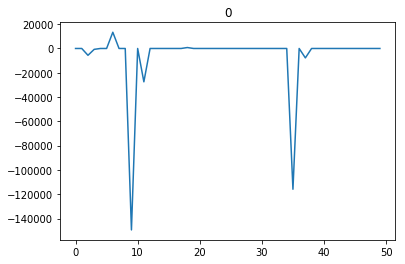

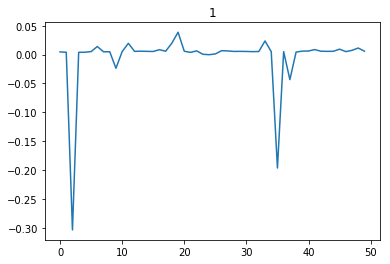

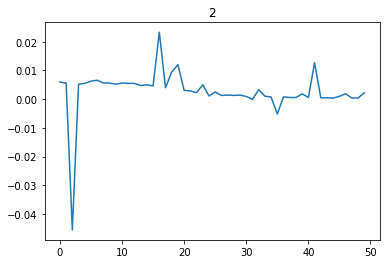

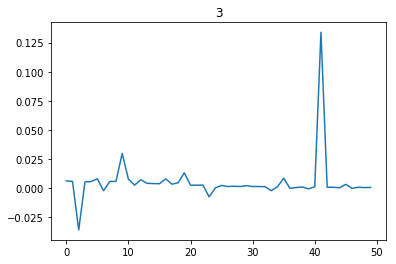

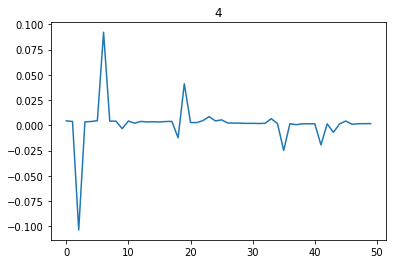

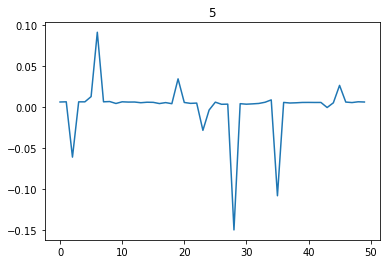

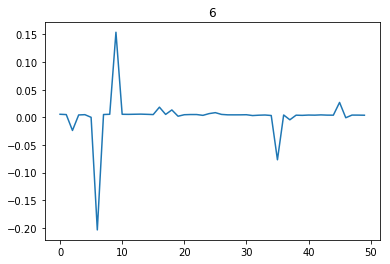

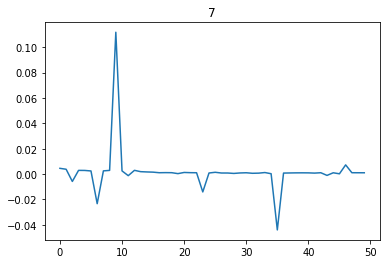

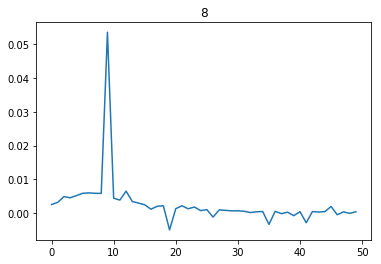

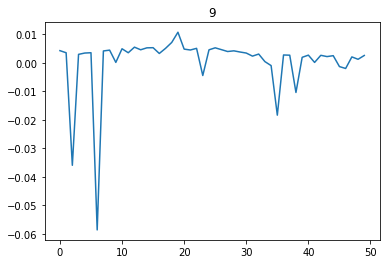

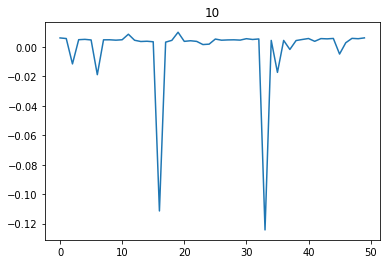

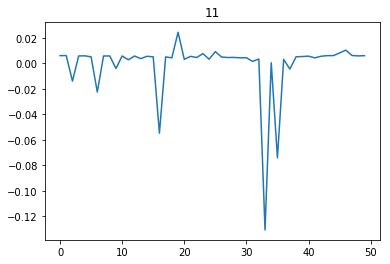

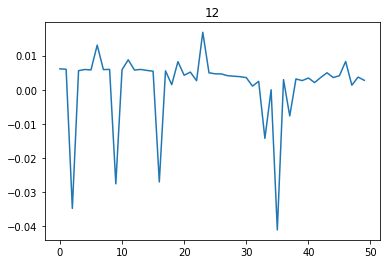

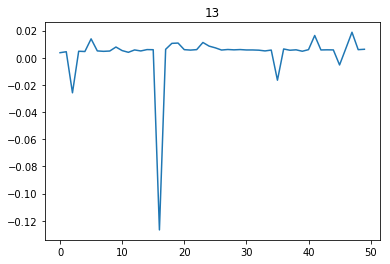

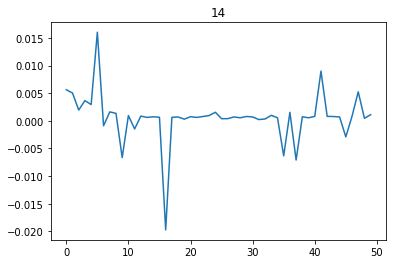

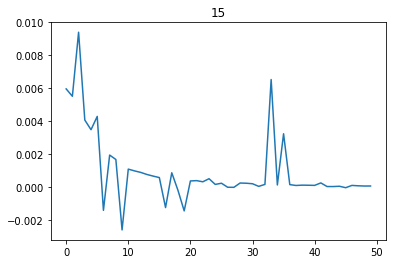

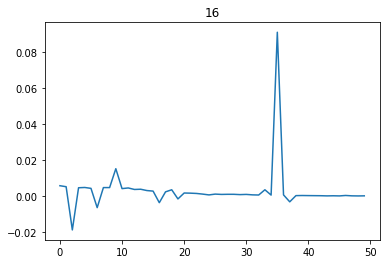

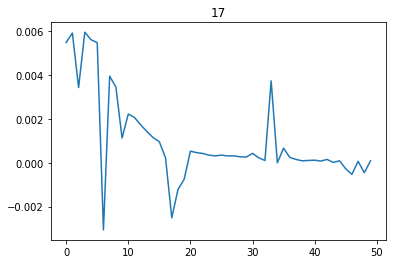

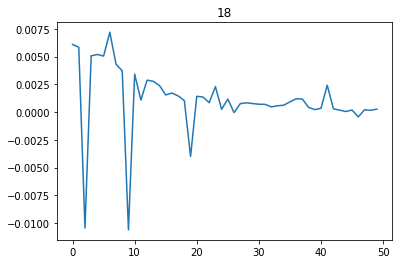

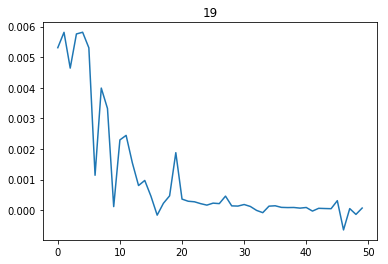

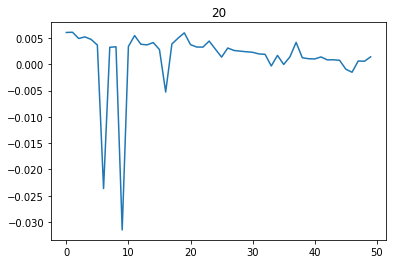

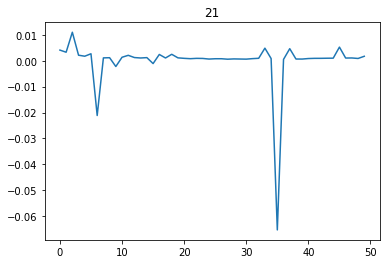

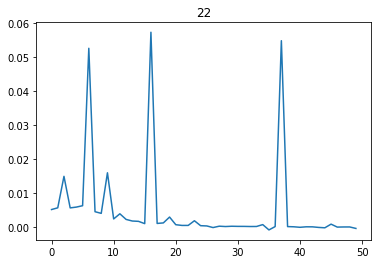

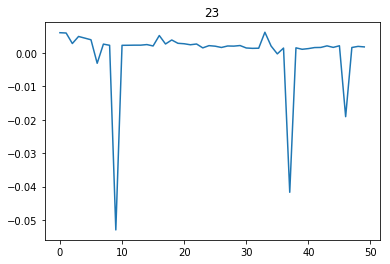

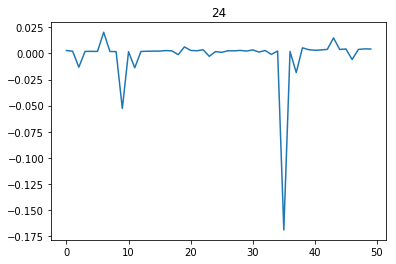

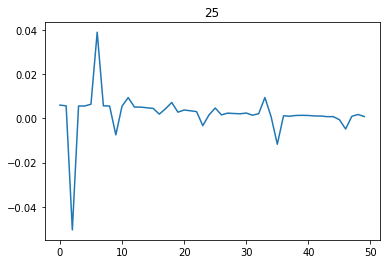

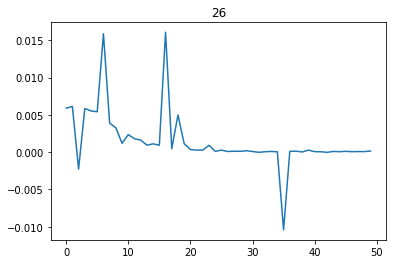

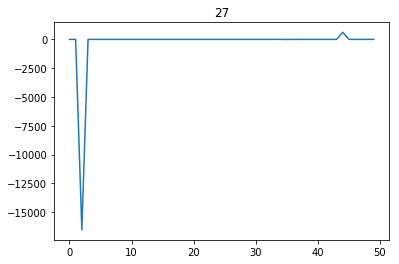

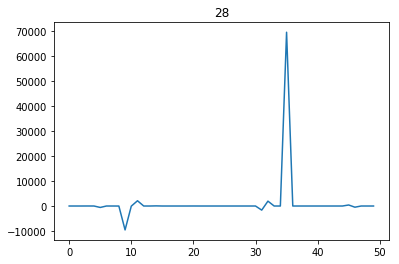

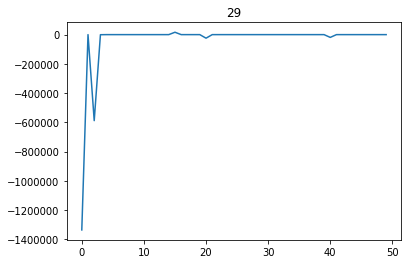

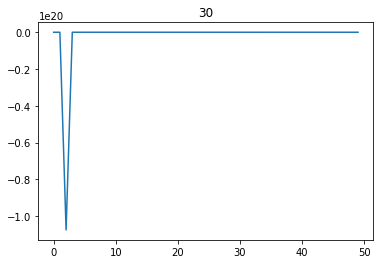

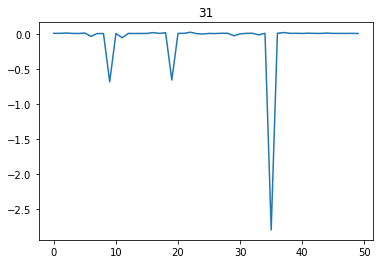

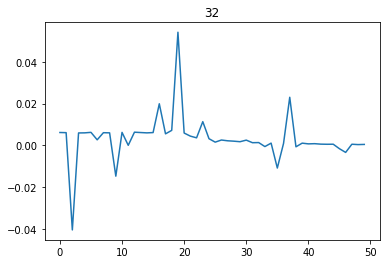

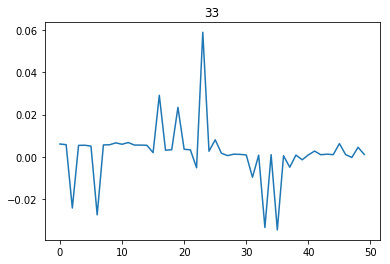

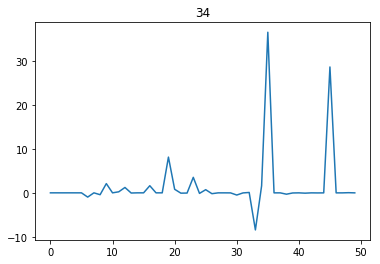

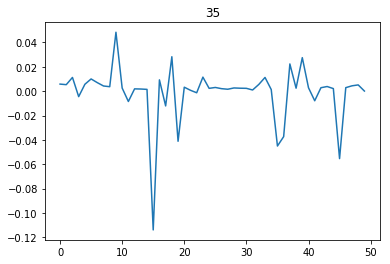

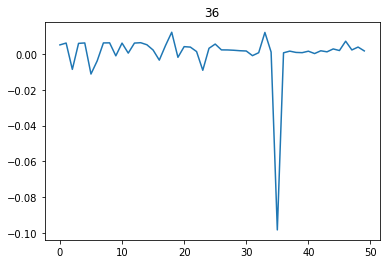

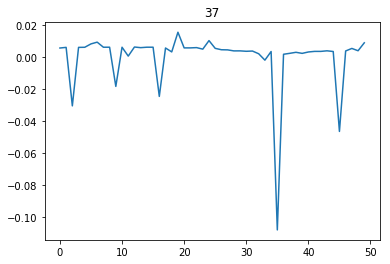

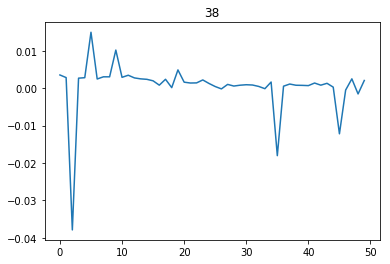

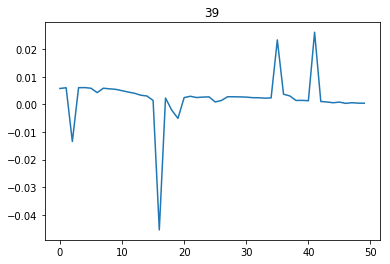

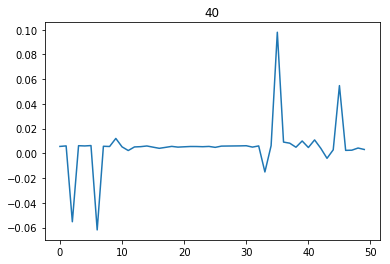

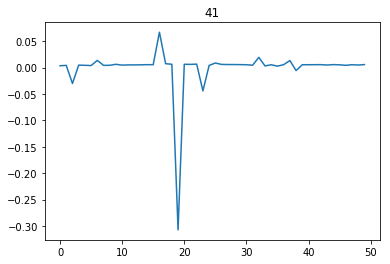

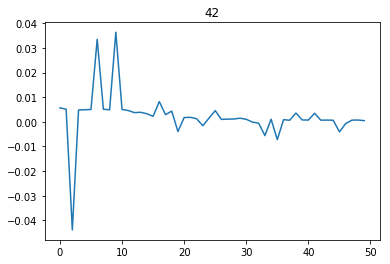

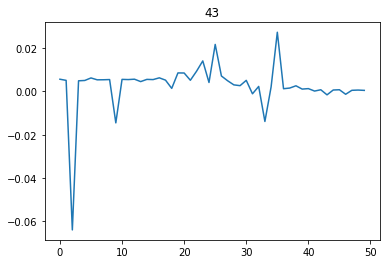

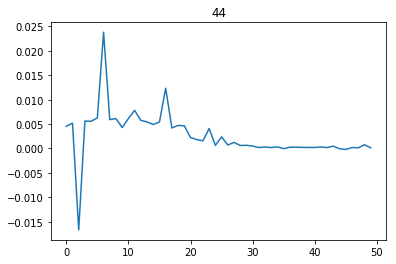

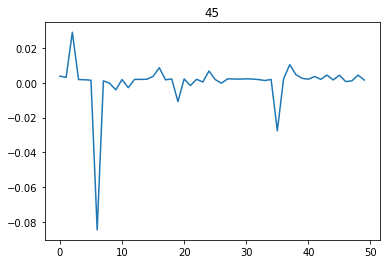

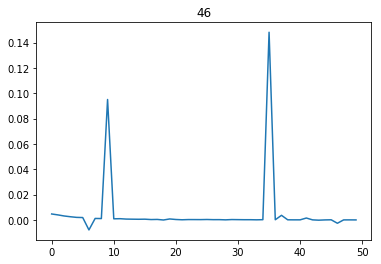

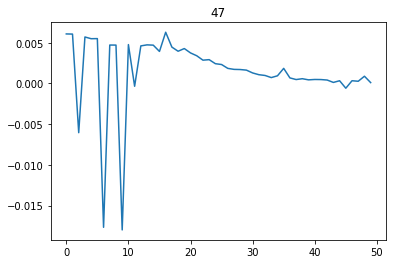

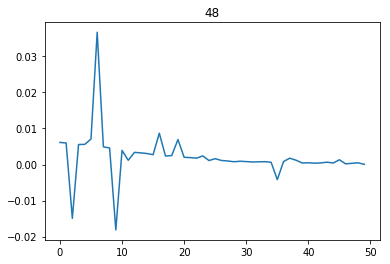

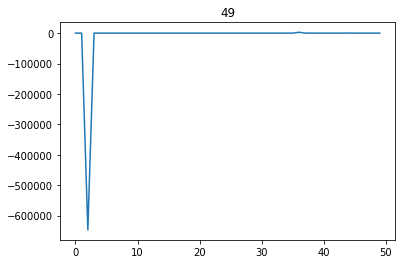

In [116]:
for token_idx in range(50):
    grads = []
    for grad in x_gradients:
        grads.append(grad[token_idx])
    plot_vector(grads, title=token_idx, to_sort=False)
    print('\n')

In [43]:
sum(x_gradients[:2])

tensor([ 3.4662e-03, -3.4662e-03, -3.4662e-03, -3.4662e-03, -3.4662e-03,
         8.0195e-02, -3.4662e-03, -3.4662e-03,  3.4662e-03, -3.4662e-03,
        -3.4662e-03, -8.7528e-02, -3.4289e-02,  3.4662e-03, -3.4662e-03,
        -3.4662e-03, -3.4662e-03,  5.8614e-02, -3.4662e-03, -2.5446e-02,
         6.2681e-02, -3.4662e-03,  1.1179e-01,  1.1488e-01, -3.4662e-03,
        -3.4662e-03, -1.2486e-01, -3.4662e-03,  3.4662e-03,  6.9447e-01,
         9.1423e-01, -3.4662e-03, -1.9727e-01, -3.4662e-03, -2.1093e-01,
        -1.1444e-01, -7.4728e-02, -3.9547e-02, -3.4662e-03,  1.9082e-01,
        -1.9610e-03,  3.4662e-03, -3.4662e-03, -3.4662e-03,  3.4662e-03,
        -3.4662e-03, -3.4662e-03,  1.6111e-02,  1.8105e-02,  3.4662e-03,
         3.4662e-03, -5.4388e-02,  3.4662e-03, -3.4662e-03,  2.7813e-01,
        -3.4662e-03, -7.9782e-02,  3.4662e-03,  2.7389e-03,  1.4568e-02,
        -3.4662e-03,  3.4662e-03,  3.4662e-03, -3.4662e-03,  2.8110e-02,
         3.4662e-03, -3.4662e-03,  3.4662e-03, -3.4

##### Analyzing temp for head only - how to aggregate 12, 12 -> 12 scores (each for one head)

For dog & parrot, the best heads in 149 iteration is 4, 9

In [94]:
torch.topk(head_temp.median(dim=1)[0], k=5, largest=True)

torch.return_types.topk(
values=tensor([1.1163, 1.0577, 1.0529, 1.0328, 1.0286]),
indices=tensor([3, 2, 7, 0, 5]))

In [163]:
head_temp = torch.tensor([[[0.7360],
         [1.2311],
         [1.1104],
         [1.0328],
         [0.7143],
         [1.2261],
         [0.8183],
         [1.1952],
         [1.1812],
         [1.2029],
         [0.8306],
         [0.8321]],

        [[1.2500],
         [0.8233],
         [0.8834],
         [0.8212],
         [1.1760],
         [1.2476],
         [1.1665],
         [0.8290],
         [0.9481],
         [0.8796],
         [0.8579],
         [0.8162]],

        [[0.7718],
         [1.0577],
         [0.7212],
         [1.1757],
         [1.1817],
         [0.7628],
         [1.2190],
         [1.1558],
         [0.8183],
         [1.2965],
         [1.0392],
         [1.3580]],

        [[1.1642],
         [1.1838],
         [1.1163],
         [1.2749],
         [0.8053],
         [0.8108],
         [0.8902],
         [0.7859],
         [1.3175],
         [1.2660],
         [1.2069],
         [0.8822]],

        [[1.2523],
         [0.9941],
         [0.7992],
         [1.1589],
         [1.2617],
         [0.8858],
         [0.6750],
         [0.7489],
         [0.7663],
         [0.9145],
         [1.2428],
         [1.0666]],

        [[0.8284],
         [0.7267],
         [1.0286],
         [1.4388],
         [0.6183],
         [0.7858],
         [1.1933],
         [1.2176],
         [1.2230],
         [0.8466],
         [1.2353],
         [1.2008]],

        [[0.7168],
         [0.7643],
         [0.8275],
         [0.7850],
         [1.2148],
         [1.1785],
         [1.1988],
         [1.3025],
         [0.7268],
         [1.1478],
         [0.9275],
         [0.7702]],

        [[1.0529],
         [0.7552],
         [0.7782],
         [1.1996],
         [1.2287],
         [1.1778],
         [1.0530],
         [1.1613],
         [1.2032],
         [0.7322],
         [0.7253],
         [0.8426]],

        [[0.6996],
         [0.6294],
         [0.9129],
         [0.7473],
         [0.7386],
         [1.1527],
         [1.1486],
         [0.8737],
         [1.1934],
         [1.0285],
         [1.1714],
         [1.1957]],

        [[0.8786],
         [0.8567],
         [1.1172],
         [0.8288],
         [0.8336],
         [0.8976],
         [0.9401],
         [0.9278],
         [1.1784],
         [1.0960],
         [0.7202],
         [0.7250]],

        [[1.2003],
         [1.3934],
         [0.9521],
         [0.7676],
         [0.8802],
         [0.7817],
         [1.3030],
         [0.6764],
         [0.8025],
         [0.7536],
         [0.5186],
         [1.2327]],

        [[1.2500],
         [0.9499],
         [0.7837],
         [0.7494],
         [0.7439],
         [1.3396],
         [1.1944],
         [1.1846],
         [1.1533],
         [0.7286],
         [0.8250],
         [0.7441]]])

In [164]:
head_temp = head_temp.squeeze(-1)

In [165]:
head_temp[-1]

tensor([1.2500, 0.9499, 0.7837, 0.7494, 0.7439, 1.3396, 1.1944, 1.1846, 1.1533,
        0.7286, 0.8250, 0.7441])

In [132]:
for head_idx in range(12):
    print(f'head_idx: {head_idx}; {head_temp[:, head_idx].median()}')

head_idx: 0; 0.878600001335144
head_idx: 1; 0.8567000031471252
head_idx: 2; 0.883400022983551
head_idx: 3; 0.8288000226020813
head_idx: 4; 0.8335999846458435
head_idx: 5; 0.897599995136261
head_idx: 6; 1.1485999822616577
head_idx: 7; 0.9277999997138977
head_idx: 8; 1.1533000469207764
head_idx: 9; 0.9144999980926514
head_idx: 10; 0.8579000234603882
head_idx: 11; 0.8425999879837036


In [168]:
torch.topk(head_temp.median(dim=0)[0], k=6, largest=True)

torch.return_types.topk(
values=tensor([1.1533, 1.1486, 0.9278, 0.9145, 0.8976, 0.8834]),
indices=tensor([8, 6, 7, 9, 5, 2]))

In [148]:
for head_idx in range(12):
    print(f'head_idx: {head_idx}; {round(head_temp[-1][head_idx].item(), 4)}')

head_idx: 0; 1.25
head_idx: 1; 0.9499
head_idx: 2; 0.7837
head_idx: 3; 0.7494
head_idx: 4; 0.7439
head_idx: 5; 1.3396
head_idx: 6; 1.1944
head_idx: 7; 1.1846
head_idx: 8; 1.1533
head_idx: 9; 0.7286
head_idx: 10; 0.825
head_idx: 11; 0.7441


In [ ]:
(head_temp[-1])

In [150]:
700 / 0.7

1000.0000000000001

In [149]:
v = head_temp[-1]
# v = head_temp.median(dim=0)[0]

torch.topk(v, k=5, largest=False)

torch.return_types.topk(
values=tensor([0.7286, 0.7439, 0.7441, 0.7494, 0.7837]),
indices=tensor([ 9,  4, 11,  3,  2]))

In [138]:
head_temp[:, [4,9]]

tensor([[0.7143, 1.2029],
        [1.1760, 0.8796],
        [1.1817, 1.2965],
        [0.8053, 1.2660],
        [1.2617, 0.9145],
        [0.6183, 0.8466],
        [1.2148, 1.1478],
        [1.2287, 0.7322],
        [0.7386, 1.0285],
        [0.8336, 1.0960],
        [0.8802, 0.7536],
        [0.7439, 0.7286]])

In [152]:
elephant_zebra_002 = torch.tensor([[1.1884],
         [0.9105],
         [0.8841],
         [0.7829],
         [0.7810],
         [0.7030],
         [0.7351],
         [1.2426],
         [1.1079],
         [1.0830],
         [0.7982],
         [1.2466]])

In [162]:
torch.topk(elephant_zebra_002.squeeze(-1), k=7, largest=True)

torch.return_types.topk(
values=tensor([1.2466, 1.2426, 1.1884, 1.1079, 1.0830, 0.9105, 0.8841]),
indices=tensor([11,  7,  0,  8,  9,  1,  2]))

In [155]:
for head_idx in range(12):
    print(f'head_idx: {head_idx}; {round(elephant_zebra_002[head_idx].item(), 4)}')

head_idx: 0; 1.1884
head_idx: 1; 0.9105
head_idx: 2; 0.8841
head_idx: 3; 0.7829
head_idx: 4; 0.781
head_idx: 5; 0.703
head_idx: 6; 0.7351
head_idx: 7; 1.2426
head_idx: 8; 1.1079
head_idx: 9; 1.083
head_idx: 10; 0.7982
head_idx: 11; 1.2466


In [161]:
elephants_zebras_004 = torch.tensor([[0.8860],
         [0.9717],
         [1.1529],
         [1.0936],
         [0.8733],
         [1.0926],
         [1.2120],
         [0.8217],
         [0.9515],
         [1.1489],
         [1.2461],
         [0.7848]])
print(torch.topk(elephants_zebras_004.squeeze(-1), k=7, largest=True))
for head_idx in range(12):
    print(f'head_idx: {head_idx}; {round(elephants_zebras_004[head_idx].item(), 4)}')

torch.return_types.topk(
values=tensor([1.2461, 1.2120, 1.1529, 1.1489, 1.0936, 1.0926, 0.9717]),
indices=tensor([10,  6,  2,  9,  3,  5,  1]))
head_idx: 0; 0.886
head_idx: 1; 0.9717
head_idx: 2; 1.1529
head_idx: 3; 1.0936
head_idx: 4; 0.8733
head_idx: 5; 1.0926
head_idx: 6; 1.212
head_idx: 7; 0.8217
head_idx: 8; 0.9515
head_idx: 9; 1.1489
head_idx: 10; 1.2461
head_idx: 11; 0.7848


In [171]:
elephants_zebras_004 = torch.tensor([[[0.9314],
         [0.9139],
         [1.0929],
         [1.1034],
         [0.8695],
         [1.0932],
         [0.8543],
         [0.9564],
         [1.1111],
         [1.1505],
         [1.1937],
         [0.9145]],

        [[1.1684],
         [1.1118],
         [1.1376],
         [0.8348],
         [1.0937],
         [1.1391],
         [0.8552],
         [1.1259],
         [1.1310],
         [0.8803],
         [0.9280],
         [1.1284]],

        [[0.8769],
         [1.1607],
         [1.1714],
         [1.1069],
         [0.8085],
         [1.2164],
         [0.8597],
         [1.1534],
         [1.1273],
         [1.1110],
         [0.9028],
         [1.1082]],

        [[1.1013],
         [1.2052],
         [1.0976],
         [0.8729],
         [0.9528],
         [0.8477],
         [0.9054],
         [1.1312],
         [0.8759],
         [0.7532],
         [1.1224],
         [1.0741]],

        [[0.8611],
         [1.0950],
         [1.1466],
         [1.1268],
         [1.1401],
         [1.1515],
         [0.8952],
         [1.1553],
         [1.1466],
         [1.1216],
         [0.8767],
         [1.1048]],

        [[1.0629],
         [0.8639],
         [0.8993],
         [1.0083],
         [1.1677],
         [1.1214],
         [0.8557],
         [1.1290],
         [1.1708],
         [0.8869],
         [0.8670],
         [0.7200]],

        [[0.8562],
         [0.8859],
         [1.1122],
         [1.1288],
         [0.9185],
         [1.1296],
         [1.1419],
         [0.8717],
         [0.7849],
         [1.1512],
         [1.1126],
         [0.8366]],

        [[0.8823],
         [1.1321],
         [0.9401],
         [1.1322],
         [0.8605],
         [1.1045],
         [0.8608],
         [0.9886],
         [0.8896],
         [1.1501],
         [0.8535],
         [1.1050]],

        [[1.1369],
         [0.9042],
         [0.8681],
         [1.1304],
         [0.9386],
         [1.1359],
         [0.8996],
         [1.1260],
         [1.1077],
         [0.9134],
         [1.1220],
         [0.8673]],

        [[0.7180],
         [0.9480],
         [1.0930],
         [0.8884],
         [0.8402],
         [1.0703],
         [0.8017],
         [1.1008],
         [0.9145],
         [0.7604],
         [1.0842],
         [1.0051]],

        [[0.8683],
         [0.9377],
         [0.9488],
         [1.1196],
         [1.1366],
         [0.8393],
         [0.8655],
         [0.8054],
         [0.9366],
         [0.8623],
         [0.8854],
         [1.1308]],

        [[0.8860],
         [0.9717],
         [1.1529],
         [1.0936],
         [0.8733],
         [1.0926],
         [1.2120],
         [0.8217],
         [0.9515],
         [1.1489],
         [1.2461],
         [0.7848]]])

In [178]:
torch.topk(elephants_zebras_004.squeeze(-1).median(dim=0)[0], k=5, largest=False)

torch.return_types.topk(
values=tensor([0.8608, 0.8823, 0.9134, 0.9185, 0.9280]),
indices=tensor([ 6,  0,  9,  4, 10]))

In [ ]:
p = cls_attentions_probs[[ 5,  6,  4], :] 
visu(original_image=original_transformed_image,
         transformer_attribution=p.mean(dim=0),
         file_name=Path(median_folder, f'plot_{iteration_idx}_mean_3_lowest_heads'))

for i in range(12):
    visu(original_image=original_transformed_image,
         transformer_attribution=cls_attentions_probs[i, :],
         file_name=Path(median_folder, f'plot_{iteration_idx}_head_{i}'))
    